In [1]:
import torch
import cv2
import pandas as pd

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
imgs = ['../data/raw/akita/Akita Inu _ Father 44kg _ YukiNoSato _ Flickr.jpg']

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-18 Python-3.12.4 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
results = model(imgs)

C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


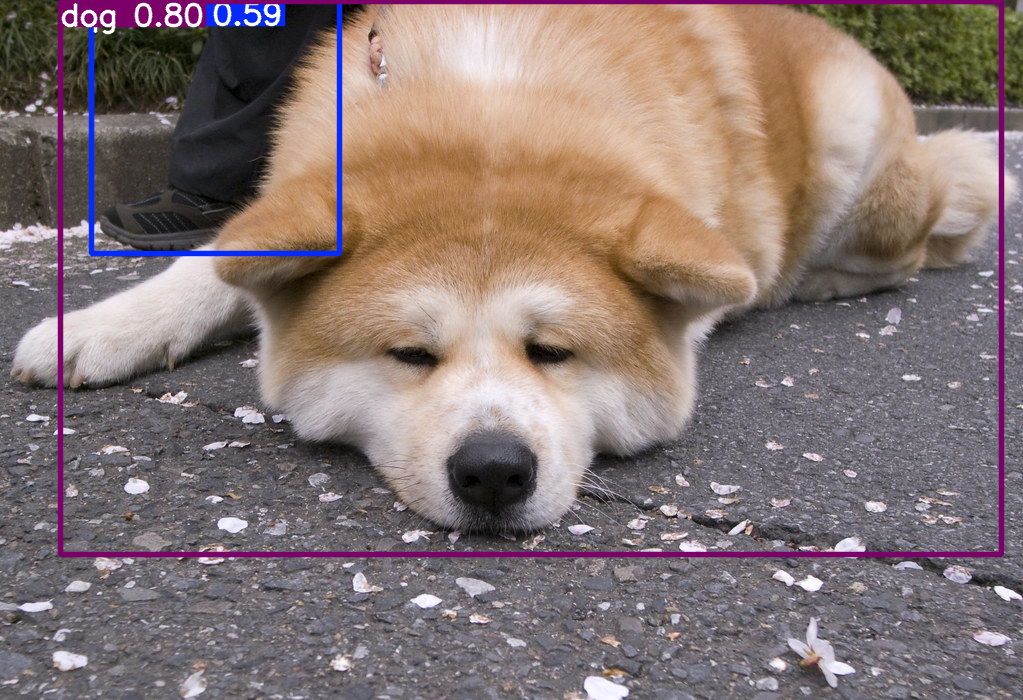

In [4]:
results.show()

In [5]:
results.pandas().xyxy[0].loc[0,'name'] # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

'dog'

In [6]:
img = cv2.imread(imgs[0])
dog_box = results.pandas().xyxy[0].iloc[0]

ymin, ymax = int(dog_box['ymin']), int(dog_box['ymax'])
xmin, xmax = int(dog_box['xmin']), int(dog_box['xmax'])

cropped_image = img[ymin:ymax, xmin:xmax ]

In [8]:
df = pd.DataFrame({
    'test': [1, 3]
})

In [10]:
for index, row in df.iterrows(): 
    print(row)

test    1
Name: 0, dtype: int64
test    3
Name: 1, dtype: int64


In [22]:
import os 

for dirpath, dirname, filename in os.walk('../data/raw'): 
    print(dirpath, filename)

../data/raw []
../data/raw\airedale_terrier ['A Day in the Life of Rolo - Airedale Terrier & Jewellery Shop Dog ....jpg', 'Airedale Terrier (@airedaleterrier.love) • Instagram photos and videos.jpg', 'Airedale Terrier_ Getting to Know Personality & Traits.jpg', 'Airedale Terrier_ Personality, Care Tips, and Breed Guide _ Funny ....jpg', 'Alert And Playful Terrier, Dog, Airedale, Terrier PNG Transparent ....jpg', "Anne's Pups.jpg", 'Cute Airedale Puppies 2025 _ www.infratrol.com.jpg', 'Funny airedale terrier dog photograpy cute spa Day in bed relaxing ....jpg', 'image copy 2.png', 'image copy 3.png', 'image copy.png', 'image.png', "Living with the 'King of Terriers' – Showsight Magazine.jpg", 'Pictures Of Airedales 2025 _ thundermountainline.com.jpg', 'Sad Airedale Terrier Dog Close Up Laying Head Down With Eyes ....jpg']
../data/raw\akita ['Akita - PDSA.jpg', 'Akita dog angry hi-res stock photography and images - Alamy.jpg', 'Akita Dog Breed Information.jpg', "Akita History_ Tracing th